In [10]:
#hypothesis 2, model 1

# Define the formula for the model
formula = 'dv_response_mean ~ number_attributes_targeted'

# Fit the model for all issues 
model = smf.ols(formula, data=df_mt_bm)
result = model.fit()

# Fit the model for digital privacy
model_digital_privacy = smf.ols(formula, data=df_mt_bm_digital_privacy)
result_digital_privacy = model_digital_privacy.fit()

# Fit the model for renewable energy
model_renewable_energy = smf.ols(formula, data=df_mt_bm_renewable_energy)
result_renewable_energy = model_renewable_energy.fit()

# Fit the model for china sanctions
model_china_sanctions = smf.ols(formula, data=df_mt_bm_china_sanctions)
result_china_sanctions = model_china_sanctions.fit()

# Fit the model for nato support
model_nato_support = smf.ols(formula, data=df_mt_bm_nato_support)
result_nato_support = model_nato_support.fit()

# Print the summary of the regression
print(result_digital_privacy.summary())

                            OLS Regression Results                            
Dep. Variable:       dv_response_mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.791
Date:                Sun, 23 Jul 2023   Prob (F-statistic):            0.00924
Time:                        13:50:26   Log-Likelihood:                -7263.0
No. Observations:                1650   AIC:                         1.453e+04
Df Residuals:                    1648   BIC:                         1.454e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

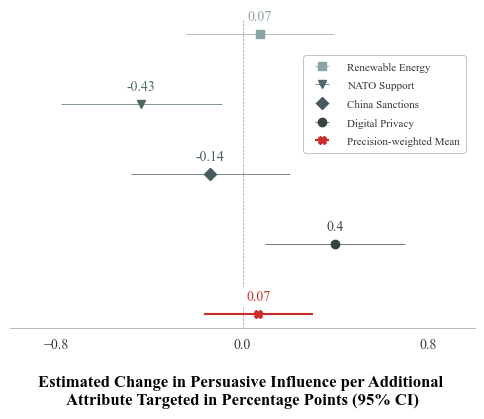

In [11]:
#FIGURE 2
# Define constants
DATAFRAMES = [df_mt_bm, df_mt_bm_digital_privacy, df_mt_bm_china_sanctions, df_mt_bm_nato_support, df_mt_bm_renewable_energy]
RESULTS = [result, result_digital_privacy, result_china_sanctions, result_nato_support, result_renewable_energy]
TITLES = ['Precision-weighted Mean', 'Digital Privacy', 'China Sanctions', 'NATO Support', 'Renewable Energy']
NEW_LABELS = {'number_attributes_targeted': ''}
COLOR_MAP = ['#CB2C2A', '#354546', '#465B5D', '#4F6769', '#8BA3A7']
MARKERS = ['X', 'o', 'D', 'v', 's']

# Set the plot dimensions
fig, ax = plt.subplots(figsize=(6,4))

# Use floating point numbers for the y_pos array
y_pos = np.arange(len(NEW_LABELS), dtype=float) - len(DATAFRAMES)/2 * 0.1

for df_i, result_i, title, color, marker in zip(DATAFRAMES, RESULTS, TITLES, COLOR_MAP, MARKERS):
    # Get the confidence intervals and create a DataFrame with the coefficients and confidence intervals
    confidence_intervals = result_i.conf_int()
    df_coef = pd.DataFrame({'coef': result_i.params, 'lower': confidence_intervals[0], 'upper': confidence_intervals[1]})
    
    # Reorder and rename the labels
    df_coef = df_coef.rename(index=NEW_LABELS).reindex(NEW_LABELS.values())

    # Remove the intercept
    df_coef = df_coef.loc[df_coef.index != 'Intercept']

    # Plot coefficients with error bars and add coefficient labels
    # Set error bar line width based on the title
    if title == 'Precision-weighted Mean':
        linewidth = None
    else:
        linewidth = 0.5

    ax.errorbar(df_coef['coef'], y_pos + 0.05, 
                xerr=(df_coef['coef'] - df_coef['lower'], df_coef['upper'] - df_coef['coef']), 
                fmt=marker, color=color, ecolor=color, capsize=0, label=title, lw=linewidth)

    for i in range(len(df_coef)):
        ax.text(df_coef['coef'][i], y_pos[i] + .075, round(df_coef['coef'][i], 2), 
                va='center', ha='center', color=color, 
                bbox=dict(facecolor='white', edgecolor='none', pad=2.1))

    # Update y_pos for next plot
    y_pos += 0.1
    
# Configure the plot
plt.axvline(0, color='#94999E', linestyle='--', linewidth=0.5)
plt.xlim(-1, 1)

ax.set_xlabel('Estimated Change in Persuasive Influence per Additional \nAttribute Targeted in Percentage Points (95% CI)', fontsize=12, fontweight='bold', labelpad=17)
ax.set_yticks(np.arange(len(NEW_LABELS)))
ax.set_yticklabels(NEW_LABELS.values())
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#94999E')
#ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.tick_params(colors='#333333')
ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
ax.tick_params(left=False)
ax.tick_params(bottom=False)

# Configure the legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[::-1], labels[::-1], loc=(0.63, 0.57), edgecolor='#94999E')
legend.get_frame().set_linewidth(0.5)

for text in legend.get_texts():
    text.set_color('#333333')
    text.set_fontsize(8)

# Display the plot
plt.show()

# Save the figure as a PDF
fig.savefig('figure2.pdf', format='pdf', bbox_inches='tight')

In [12]:
# Define the formula for the model
formula = 'dv_response_mean ~ a_1 + a_3 + a_5 + a_7 + a_9'

# Fit the model for all issues 
model = smf.ols(formula, data=df_mt_bm)
result = model.fit()

# Fit the model for digital privacy
model_digital_privacy = smf.ols(formula, data=df_mt_bm_digital_privacy)
result_digital_privacy = model_digital_privacy.fit()

# Fit the model for renewable energy
model_renewable_energy = smf.ols(formula, data=df_mt_bm_renewable_energy)
result_renewable_energy = model_renewable_energy.fit()

# Fit the model for china sanctions
model_china_sanctions = smf.ols(formula, data=df_mt_bm_china_sanctions)
result_china_sanctions = model_china_sanctions.fit()

# Fit the model for nato support
model_nato_support = smf.ols(formula, data=df_mt_bm_nato_support)
result_nato_support = model_nato_support.fit()

# Print the summary of the regression
print(result_nato_support.summary())

                            OLS Regression Results                            
Dep. Variable:       dv_response_mean   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.107
Date:                Sun, 23 Jul 2023   Prob (F-statistic):             0.0619
Time:                        13:50:27   Log-Likelihood:                -7816.2
No. Observations:                1713   AIC:                         1.564e+04
Df Residuals:                    1707   BIC:                         1.568e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6114      1.240     31.133      0.0

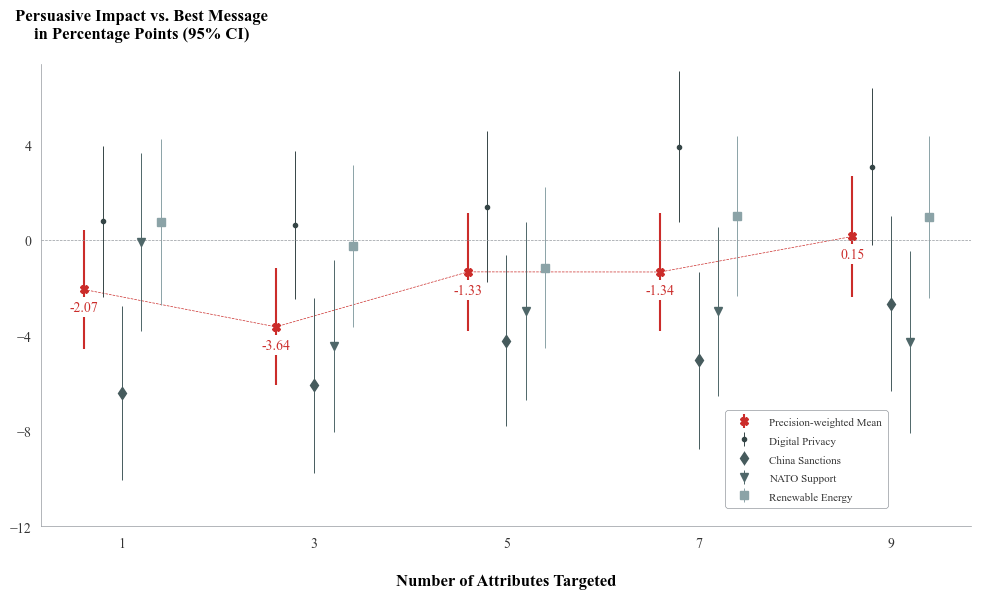

In [13]:
#FIGURE 3
# Set the font to "Times New Roman"
plt.rcParams["font.family"] = "Times New Roman"

# Define constants
RESULTS = [result, result_digital_privacy, result_china_sanctions, result_nato_support, result_renewable_energy]
LABELS = ['Precision-weighted Mean', 'Digital Privacy', 'China Sanctions', 'NATO Support', 'Renewable Energy']
COLOR_MAP = ['#CB2C2A', '#354546', '#465B5D', '#4F6769', '#8BA3A7']
MARKERS = ['X', '.', 'd', 'v', 's']

# Set the plot dimensions
fig, ax = plt.subplots(figsize=(12,6))

# Use floating point numbers for the x_pos array
x_pos = np.arange(len(result.params.index[1:]), dtype=float) - len(RESULTS)/2 * 0.1

for result_i, label, color, marker in zip(RESULTS, LABELS, COLOR_MAP, MARKERS):
    # Get the coefficients and confidence intervals excluding intercept
    coefficients = result_i.params[1:]
    cis = result_i.conf_int().iloc[1:]
    
    # Create a DataFrame with the coefficients and confidence intervals
    df_coef = pd.DataFrame({'coef': coefficients, 'lower': cis[0], 'upper': cis[1]})
    
    # Plot coefficients with error bars and add coefficient labels
    eb = ax.errorbar(x_pos + 0.05, df_coef['coef'], 
                yerr=(df_coef['coef'] - df_coef['lower'], df_coef['upper'] - df_coef['coef']), 
                fmt=marker, color=color, ecolor=color, capsize=0, label=label)

    # Change linewidth of error bars for non 'Precision-weighted Mean' labels
    if label != 'Precision-weighted Mean':
        eb[-1][0].set_linewidth(0.7)  # Here '-1' is used to access the error bar line collection
    
    # Connect points with dashed line for 'Precision-weighted Mean' only
    if label == 'Precision-weighted Mean':
        ax.plot(x_pos + 0.05, df_coef['coef'], color=color, linestyle='dashed', linewidth=0.5)

    # Add labels below the 'Precision-weighted Mean' dots
    if label == 'Precision-weighted Mean':
        for i in range(len(df_coef)):
            ax.text(x_pos[i] + 0.05, df_coef['coef'][i] - 0.75, round(df_coef['coef'][i], 2), 
                    va='center', ha='center', color=color, 
                    bbox=dict(facecolor='white', edgecolor='none', pad=2.1))

    # Update x_pos for next plot
    x_pos += 0.1

# Configure the plot
plt.axhline(0, color='#94999E', linestyle='--', linewidth=0.5)
plt.ylim(-12, max(df_coef['upper']+3))

# ax.set_ylabel('Persuasive Impact vs. \nBest Message\n(95% CI)', fontsize=12, fontweight='bold', labelpad=17, rotation=0)
ax.text(.1, 9, 'Persuasive Impact vs. Best Message\nin Percentage Points (95% CI)', rotation=0, va='center', ha='center', fontweight='bold', fontsize=12)
ax.set_xlabel('Number of Attributes Targeted', fontsize=12, fontweight='bold', labelpad=17)
ax.set_xticks(np.arange(len(result.params.index[1:])))
new_xticklabels = [label.replace('a_', '') for label in result.params.index[1:]]
ax.set_xticklabels(new_xticklabels, rotation=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#94999E')
ax.spines['bottom'].set_color('#94999E')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.tick_params(colors='#333333')
ax.yaxis.set_major_locator(ticker.MaxNLocator(5))
ax.tick_params(left=False)
ax.tick_params(bottom=False)

# Configure the legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(loc=(0.735, 0.04), edgecolor='#94999E')
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)

for text in legend.get_texts():
    text.set_color('#333333')
    text.set_fontsize(8)

# Display the plot
plt.show()

# Save the figure as a PDF
fig.savefig('figure3.pdf', format='pdf', bbox_inches='tight')